<a href="https://colab.research.google.com/github/wyctorfogos/MNIST---PyTorch/blob/main/Train_MNIST_CLASSIFICATION_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 32.6 MB/s 


In [ ]:
import torch 
from torch import nn
from torch.optim import RMSprop
from torchmetrics import Accuracy
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor 

In [ ]:
from torchvision.datasets.fakedata import transforms
train= datasets.MNIST(root='data', download=True, train=True, transform=ToTensor())
test= datasets.MNIST(root='data',download=True, train=False, transform=ToTensor())

dataset_train = DataLoader(train, batch_size=32, shuffle=True)
dataset_test = DataLoader(test, batch_size=32, shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
## Model

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    #self.model=nn.Sequential(
    #    nn.Conv2d(1,32,(4,4)),
    #    nn.Sigmoid(),
    #    nn.Conv2d(32,64,(4,4)),
    #    nn.Sigmoid(),
    #    nn.Conv2d(64,128,(4,4)),
    #    nn.Sigmoid(),
    #    nn.Flatten(),
    #    nn.Linear(46208,10)      
    #)
    self.hidden1=nn.Conv2d(1,32,(4,4))
    self.action1=nn.Sigmoid()
    self.hidden2=nn.Conv2d(32,64,(4,4))
    self.action2=nn.Sigmoid()
    self.hidden3=nn.Conv2d(64,128,(4,4))
    self.action3=nn.Sigmoid()
    self.hidden4=nn.Flatten()
    self.hidden5=nn.Linear(in_features=46208, out_features=100)
    #self.action4=nn.Softmax()
    self.hidden6=nn.Linear(in_features=100, out_features=10)      
    
    #RESIDUAL OPERATIONS
    self.actionELU= nn.ELU()

  def forward(self,x):
    #return self.model(x)
    X=self.hidden1(x)
    X1=self.action1(X)
    #X2=self.actionELU(X)
    #X3=X1+X2
    #X=self.action1(X3)
    X=self.hidden2(X)
    X=self.action2(X)
    #X2=self.actionELU(X)
    #X3=X1+X2
    X=self.hidden3(X)
    X=self.action3(X)    
    X=self.hidden4(X)
    X=self.hidden5(X)
    X=self.hidden6(X)
    #X=self.action4(X)
    
    return X

classifier=Classifier().to('cuda')

optm=RMSprop(classifier.parameters(), lr=1e-3)
loss_function = nn.CrossEntropyLoss()

In [ ]:
## Trainning process
epochs=10

if __name__== "__main__":
  for epoch in range(epochs):
    for batch in dataset_train:
      X, Y= batch
      X, Y= X.to('cuda'), Y.to('cuda')

      Y_pred= classifier(X)
      loss= loss_function(Y_pred,Y)
      
      optm.zero_grad()
      loss.backward()
      optm.step()

    print("Epoch:{}, loss:{}".format(epoch, loss.item()))

Epoch:0, loss:0.3992914855480194
Epoch:1, loss:0.029638243839144707
Epoch:2, loss:0.140410915017128
Epoch:3, loss:0.12393149733543396
Epoch:4, loss:0.006900692358613014
Epoch:5, loss:0.007851911708712578
Epoch:6, loss:0.017818063497543335
Epoch:7, loss:0.0007711980142630637
Epoch:8, loss:0.06765918433666229
Epoch:9, loss:0.00025007803924381733


In [ ]:
## Test process
epochs=10

if __name__== "__main__":
  for epoch in range(epochs):
    for batch in dataset_test:
      X, Y= batch
      X, Y= X.to('cuda'), Y.to('cuda')

      Y_pred= classifier(X)
      loss= loss_function(Y_pred,Y)
      
      #optm.zero_grad()
      #loss.backward()
      #optm.step()

    print("Epoch:{}, loss:{}".format(epoch, loss.item()))

Epoch:0, loss:1.8141374312108383e-05
Epoch:1, loss:1.8141374312108383e-05
Epoch:2, loss:1.8141374312108383e-05
Epoch:3, loss:1.8141374312108383e-05
Epoch:4, loss:1.8141374312108383e-05
Epoch:5, loss:1.8141374312108383e-05
Epoch:6, loss:1.8141374312108383e-05
Epoch:7, loss:1.8141374312108383e-05
Epoch:8, loss:1.8141374312108383e-05
Epoch:9, loss:1.8141374312108383e-05


In [ ]:
from torch import save, load

with open('classifier_digits.pt','wb') as f:
  save(classifier.state_dict(), f)

In [ ]:
with open('classifier_digits.pt', 'rb') as f:
  classifier.load_state_dict(load(f))

In [ ]:
import numpy as np

index=np.random.randint(16)
print(index)

t=X[index]#.unsqueeze(0)
t.shape

14


torch.Size([1, 28, 28])

In [ ]:
from torchvision import transforms as T

transform = T.ToPILImage()

# convert the tensor to PIL image using above transform
img = transform(t)

# display the PIL image
img.show()

In [ ]:
y_test=torch.argmax(classifier(t.unsqueeze(0)))
print(y_test)
print(Y[index])


tensor(5, device='cuda:0')
tensor(5, device='cuda:0')


AUTOENCODER - MNIST

In [ ]:
from torchvision.datasets.fakedata import transforms
train= datasets.MNIST(root='data', download=True, train=True, transform=ToTensor())
test= datasets.MNIST(root='data',download=True, train=False, transform=ToTensor())

dataset_train = DataLoader(train, batch_size=64, shuffle=True)
dataset_test = DataLoader(test, batch_size=64, shuffle=False)

In [ ]:
dataset_train_iter = iter(dataset_train)
images_train, labels_train =next(dataset_train_iter)

dataset_test_iter = iter(dataset_test)
images_test, labels_test =next(dataset_test_iter)

In [ ]:
from torch.nn.modules.conv import ConvTranspose2d

class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    ##self.hidden1=nn.Conv2d(1, 32,(4,4))
    ##self.pool1= nn.MaxPool2d(kernel_size=4, stride=2)
    ##self.action1=nn.Sigmoid()
    ##self.hidden2=nn.Conv2d(32, 64,(4,4))
    ##self.pool2= nn.MaxPool2d(kernel_size=4, stride=2)
    ##self.action2=nn.Sigmoid()
    ##self.hidden3=nn.Conv2d(64, 128,(4,4))
    ##self.pool3= nn.MaxPool2d(kernel_size=4, stride=2)
    ##self.action3=nn.Sigmoid()

    

    ##self.flat=nn.Flatten()
    ##self.linear=nn.Linear()
    ##self.relu=nn.Relu()

    ##self.deconv=nn.ConvTranspose2d()

    self.encoder=nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        #nn.ReLU(),
        #nn.Linear(64,12),
        #nn.ReLU(),
        #nn.Linear(12,3),
    )

    self.decoder=nn.Sequential(
        #nn.Linear(3,12),
        #nn.ReLU(),
        #nn.Linear(12,64),
        #nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid()
    )


  def forward(self, x):
    ##Feature Extraction block
    ##X=self.hidden1(x)
    ##X=self.pool1(X)
    ##X=self.action1(X)
    ##X=self.hidden2(X)
    ##X=self.pool2(X)
    ##X=self.action2(X)
    ##X=self.hidden3(X)
    ##X=self.pool3(X)
    ##X=self.action3(X)

    ##Latent Space
    ##X=self.flat(X)
    ##X=self.deconv(X)

    X= self.encoder(x)
    X= self.decoder(X)

    return X


In [ ]:
Auto_Encoder=AutoEncoder().to('cpu')

optm=torch.optim.Adam(Auto_Encoder.parameters(), lr=1e-4, weight_decay=1e-3)
loss_function = nn.MSELoss()

In [ ]:
epochs=10
out_puts=[]

if __name__== "__main__":
  for epoch in range(epochs):
    for batch in dataset_train:
      X, _ = batch
      X = X.reshape(-1, 28*28)

      #X = X.to('cuda')
      
      X_pred = Auto_Encoder(X)
      loss= loss_function(X_pred,X)
      
      optm.zero_grad()
      loss.backward()
      optm.step()
    
    print("Epoch:{}, loss:{}".format(epoch, loss.item()))
    out_puts.append((epoch,loss, X, X_pred))

Epoch:0, loss:0.07208190858364105
Epoch:1, loss:0.06627959758043289
Epoch:2, loss:0.07475173473358154
Epoch:3, loss:0.07112675905227661
Epoch:4, loss:0.07104597985744476
Epoch:5, loss:0.06787284463644028
Epoch:6, loss:0.06763096898794174
Epoch:7, loss:0.06862391531467438
Epoch:8, loss:0.06968369334936142
Epoch:9, loss:0.06507174670696259


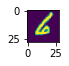

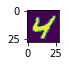

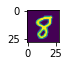

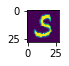

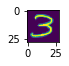

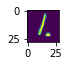

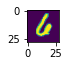

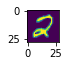

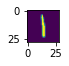

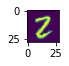

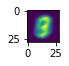

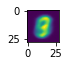

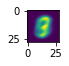

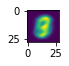

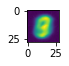

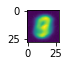

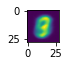

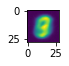

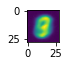

In [ ]:
import matplotlib.pyplot as plt


for i in range(0,1,4):
  imgs=out_puts[i][2].detach().numpy()
  reconsts=out_puts[i][3].detach().numpy()

  for i, item in enumerate(imgs):
    if i>9:
      break
    plt.subplot(2,9,i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])
    plt.show()
  
  for i, item in enumerate(reconsts):
    if i>=9:
      break
    plt.subplot(2,9,9+i)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])
    plt.show()


